## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

## **1. Explore the Dataset**

In [2]:
weather = pd.read_csv('weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Conver date to datetime
weather['Date'] = pd.to_datetime(weather['Date'])
# Set Date as index
weather.set_index('Date', inplace=True)
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print('The shape of this dataset is', weather.shape)

The shape of this dataset is (145460, 22)


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm     

In [6]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# Check for null values
nullValues = weather.isnull().sum()
print('Number of null values in each column:\n') 
nullValues

Number of null values in each column:



Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
# Percentage of missing values of each column
nullValues/len(weather)

Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

### **Target Variable: RainTomorrow** 

## **2. Fill in Missing Values**

In [9]:
# Drop columns which have more than 10% missing values
weather = weather.drop(columns=['Evaporation', 
                                'Sunshine', 
                                'Cloud9am', 
                                'Cloud3pm'])
# Drop missing values from the target variable
weather = weather.dropna(subset=['RainTomorrow'])
weather.isnull().sum()/len(weather)

Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RainTomorrow     0.000000
dtype: float64

In [10]:
# Drop rows from columns which have more than 3% null values 
weather = weather.dropna(subset=['Pressure9am', 
                                 'Pressure3pm',
                                 'WindGustSpeed',
                                 'WindGustDir',
                                 'WindDir9am'])
weather.isnull().sum()/len(weather)

Location         0.000000
MinTemp          0.001078
MaxTemp          0.000405
Rainfall         0.007937
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.003934
WindSpeed9am     0.000000
WindSpeed3pm     0.000423
Humidity9am      0.006686
Humidity3pm      0.012302
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.001182
Temp3pm          0.006246
RainToday        0.007937
RainTomorrow     0.000000
dtype: float64

In [11]:
# Drop rows from columns which have more than 1% missing values
weather = weather.dropna(subset=['Humidity3pm'])
weather.isnull().sum()/len(weather)

Location         0.000000
MinTemp          0.000786
MaxTemp          0.000175
Rainfall         0.007904
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.003773
WindSpeed9am     0.000000
WindSpeed3pm     0.000279
Humidity9am      0.001511
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000847
Temp3pm          0.000000
RainToday        0.007904
RainTomorrow     0.000000
dtype: float64

In [12]:
# Drop missing categorical values
weather = weather.dropna(subset=['WindDir3pm',
                                 'RainToday'])
weather.info()
weather.isnull().sum()/len(weather)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113160 entries, 2008-12-01 to 2017-06-24
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113160 non-null  object 
 1   MinTemp        113101 non-null  float64
 2   MaxTemp        113140 non-null  float64
 3   Rainfall       113160 non-null  float64
 4   WindGustDir    113160 non-null  object 
 5   WindGustSpeed  113160 non-null  float64
 6   WindDir9am     113160 non-null  object 
 7   WindDir3pm     113160 non-null  object 
 8   WindSpeed9am   113160 non-null  float64
 9   WindSpeed3pm   113160 non-null  float64
 10  Humidity9am    112994 non-null  float64
 11  Humidity3pm    113160 non-null  float64
 12  Pressure9am    113160 non-null  float64
 13  Pressure3pm    113160 non-null  float64
 14  Temp9am        113069 non-null  float64
 15  Temp3pm        113160 non-null  float64
 16  RainToday      113160 non-null  object 
 17  RainTomorrow 

Location         0.000000
MinTemp          0.000521
MaxTemp          0.000177
Rainfall         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.001467
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000804
Temp3pm          0.000000
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

In [13]:
# Replace null values in other columns with medians
for x in ['MinTemp', 'MaxTemp', 'Humidity9am', 'Temp9am']:
  weather[x].fillna(weather[x].median(), inplace=True)

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113160 entries, 2008-12-01 to 2017-06-24
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113160 non-null  object 
 1   MinTemp        113160 non-null  float64
 2   MaxTemp        113160 non-null  float64
 3   Rainfall       113160 non-null  float64
 4   WindGustDir    113160 non-null  object 
 5   WindGustSpeed  113160 non-null  float64
 6   WindDir9am     113160 non-null  object 
 7   WindDir3pm     113160 non-null  object 
 8   WindSpeed9am   113160 non-null  float64
 9   WindSpeed3pm   113160 non-null  float64
 10  Humidity9am    113160 non-null  float64
 11  Humidity3pm    113160 non-null  float64
 12  Pressure9am    113160 non-null  float64
 13  Pressure3pm    113160 non-null  float64
 14  Temp9am        113160 non-null  float64
 15  Temp3pm        113160 non-null  float64
 16  RainToday      113160 non-null  object 
 17  RainTomorrow 

## **3. Initial Visualization**

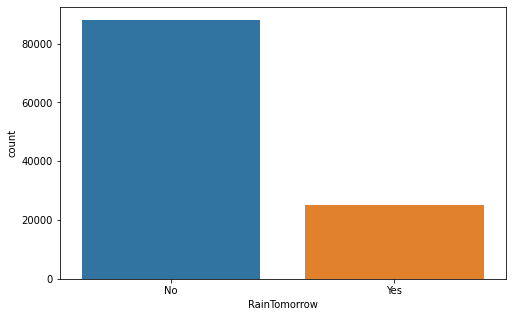

In [15]:
plt.figure(figsize=[8,5])
sns.countplot(x=weather['RainTomorrow'])
plt.show()

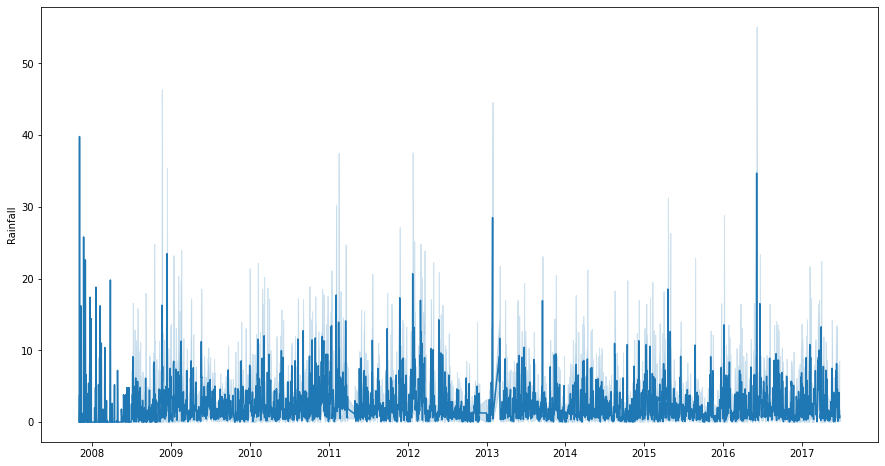

In [16]:
# Rainfall over time
plt.figure(figsize=[15,8])
sns.lineplot(x=weather.index.values, y=weather['Rainfall'])
plt.show()

## **4. Train and Split the data**

In [17]:
# Get dummies
weather1 = pd.get_dummies(data=weather, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
weather1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [18]:
# X and y
X = weather1.drop(columns=['RainTomorrow'])
y = weather1['RainTomorrow']

In [19]:
# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79212, 106)
(79212,)
(33948, 106)
(33948,)


## **5. Rain Prediction - Logistic Regression**

In [20]:
# Logistic regression cross validation and regularization
for C in [0.1, 1, 10, 100]:
  model = LogisticRegression(max_iter=10000, C=C)
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  print(f"Logistic Regression with C={C} cross validation score: {score}")

Logistic Regression with C=0.1 cross validation score: 0.8506412567460357
Logistic Regression with C=1 cross validation score: 0.8527116426322637
Logistic Regression with C=10 cross validation score: 0.8527621444941174
Logistic Regression with C=100 cross validation score: 0.8528505251429443


In [21]:
# Logistic Regression
model1 = LogisticRegression(max_iter=10000, C=100)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
acc1 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy =', acc1)

Accuracy = 0.8544833274419701


[[24968  1416]
 [ 3524  4040]]


<Figure size 432x432 with 0 Axes>

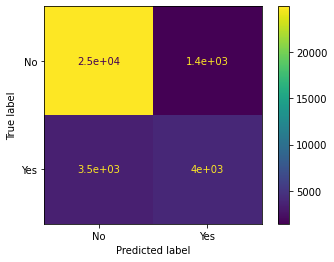

In [22]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plt.figure(figsize=[6,6])
metrics.plot_confusion_matrix(model1, X_test, y_test)
plt.show()

## **6. Rain Prediction - Decision Tree**

In [23]:
# Decision Tree cross validation
for max_depth in [5, 10, 15, 30]:
  model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  print(f"Decision Tree with max depth={max_depth} cross validation score: {score}")

Decision Tree with max depth=5 cross validation score: 0.8406680219518947
Decision Tree with max depth=10 cross validation score: 0.8382440823927804
Decision Tree with max depth=15 cross validation score: 0.8224510347451073
Decision Tree with max depth=30 cross validation score: 0.7945259674404354


In [24]:
# Decision Tree
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy =', acc2)

Accuracy = 0.8429067986332037


[[25335  1049]
 [ 4284  3280]]


<Figure size 432x432 with 0 Axes>

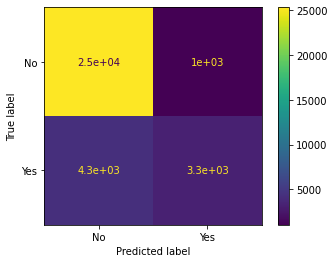

In [25]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plt.figure(figsize=[6,6])
metrics.plot_confusion_matrix(model2, X_test, y_test)
plt.show()

In [26]:
imp = pd.DataFrame(zip(X.columns, model2.feature_importances_), columns=['feature', 'importance'])
imp.sort_values(by='importance', ascending=False)[:7]

,feature,importance
7,Humidity3pm,0.746800
3,WindGustSpeed,0.123206
9,Pressure3pm,0.076817
2,Rainfall,0.041227
6,Humidity9am,0.008229
11,Temp3pm,0.003190
0,MinTemp,0.000532


## **6. Rain Prediction - Random Forest**

In [36]:
# Use the max depth from decision tree
# Random Forest cross validation
for max_depth in [10, 50, 100, 150]:
  model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=2021)
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  print(f"Random Forest with max_depth={max_depth} cross validation score: {score}")

Random Forest with max_depth=10 cross validation score: 0.8456420122897799
Random Forest with max_depth=50 cross validation score: 0.8558929770433992
Random Forest with max_depth=100 cross validation score: 0.8559308574240945
Random Forest with max_depth=150 cross validation score: 0.8559308574240945


In [37]:
# Random Forest
model3 = RandomForestClassifier(n_estimators=100, max_depth=150)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
acc3 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy =', acc3)

Accuracy = 0.858194886296689


[[25253  1131]
 [ 3683  3881]]


<Figure size 432x432 with 0 Axes>

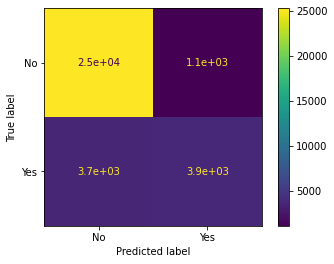

In [40]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plt.figure(figsize=[6,6])
metrics.plot_confusion_matrix(model3, X_test, y_test)
plt.show()

In [41]:
# Feature importance of random forest
imp = pd.DataFrame(zip(X.columns, model2.feature_importances_), columns=['feature', 'importance'])
imp.sort_values(by='importance', ascending=False)[:7]

,feature,importance
7,Humidity3pm,0.746800
3,WindGustSpeed,0.123206
9,Pressure3pm,0.076817
2,Rainfall,0.041227
6,Humidity9am,0.008229
11,Temp3pm,0.003190
0,MinTemp,0.000532


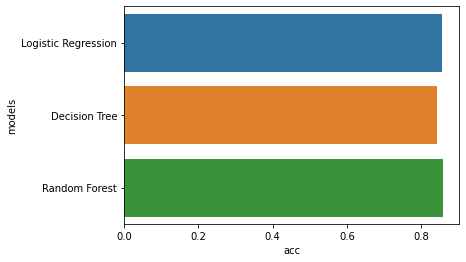

In [54]:
# Model visualization 
d = {'models': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
      'acc':[acc1, acc2, acc3]}
accDF = pd.DataFrame(data=d)
sns.barplot(x='acc', y='models', data=accDF)
plt.show()